In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_olivetti_faces
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture


In [28]:
def plot_anomaly_detection(X, gmm, pca, title):
    log_likelihood_normal = gmm.score_samples(X)
    X_original = pca.inverse_transform(X)
    
    X_flipped = np.array([np.flip(img.reshape(64, 64), axis=1).flatten() for img in X_original])
    log_likelihood_flipped = gmm.score_samples(pca.transform(X_flipped))
    
    X_darkened = np.array([np.clip(img.reshape(64, 64) - 0.3, 0, 1).flatten() for img in X_original])
    log_likelihood_darkened = gmm.score_samples(pca.transform(X_darkened))

    
    fig, axes = plt.subplots(1, len(X), figsize=(10, 5))
    for i, ax in enumerate(axes):
        ax.imshow(X_original[i].reshape(64, 64), cmap='gray')
        ax.axis('off')
    plt.suptitle(f'{title} - Normal Faces')
    plt.show()

    plt.figure(figsize=(10, 6))
    plt.hist([log_likelihood_normal[:len(X)], log_likelihood_flipped[:len(X)], log_likelihood_darkened[:len(X)]],
             bins=30, label=['Normal', 'Flipped', 'Darkened'], alpha=0.7)
    plt.legend()
    plt.title('Log Likelihood for Normal vs Modified Images')
    plt.xlabel('Log Likelihood')
    plt.ylabel('Frequency')
    plt.show()




def visualize_reconstruction_error(X, reconstruction_error, title):
    fig, axes = plt.subplots(2, 5, figsize=(10, 5))
    for i, ax in enumerate(axes.flat):
        ax.imshow(X[i].reshape(64, 64), cmap='gray')
        ax.axis('off')
    plt.suptitle(title)
    plt.show()

In [29]:
data = fetch_olivetti_faces(shuffle=True, random_state=60)
X = data.data
y = data.target

pca = PCA(n_components=0.99, whiten=True, random_state=60)
X_pca = pca.fit_transform(X)

gmm = GaussianMixture(n_components=40, random_state=60)
gmm.fit(X_pca)

C:\Users\marce\anaconda4\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


GaussianMixture(n_components=40, random_state=60)

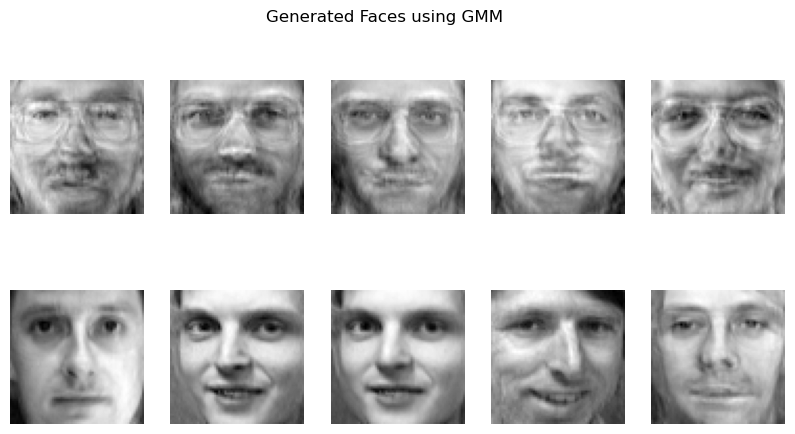

In [30]:

generated_faces_pca = gmm.sample(10)[0]
generated_faces = pca.inverse_transform(generated_faces_pca)

fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i, ax in enumerate(axes.flat):
    ax.imshow(generated_faces[i].reshape(64, 64), cmap='gray')
    ax.axis('off')
plt.suptitle('Generated Faces using GMM')
plt.show()

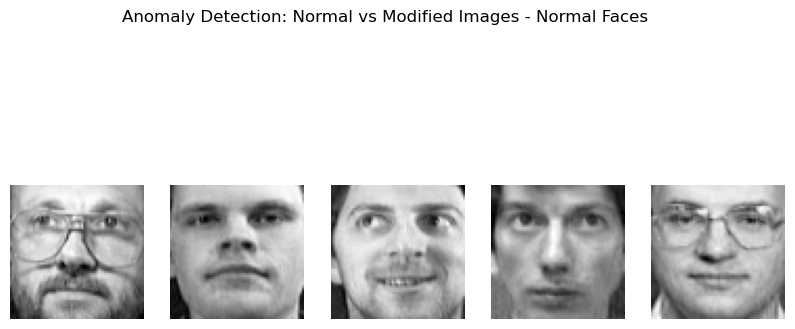

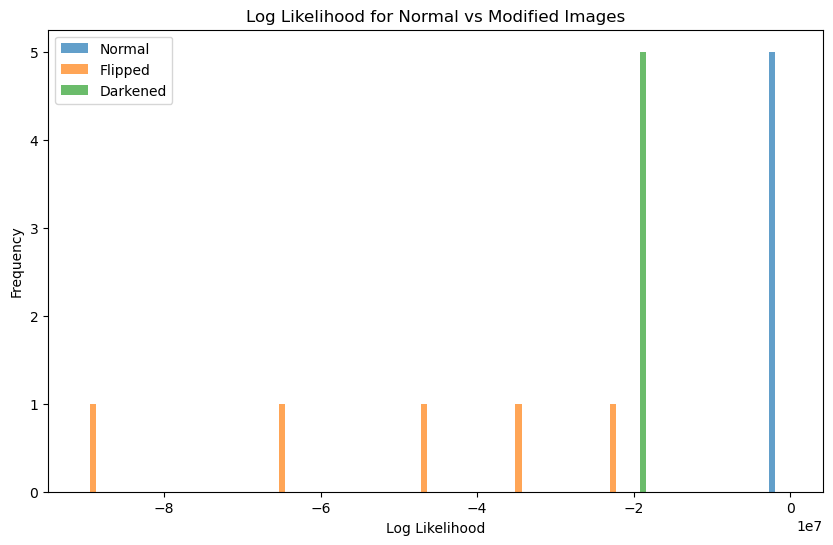

In [31]:
X_test = X_pca[:5]
plot_anomaly_detection(X_test, gmm, pca, 'Anomaly Detection: Normal vs Modified Images')

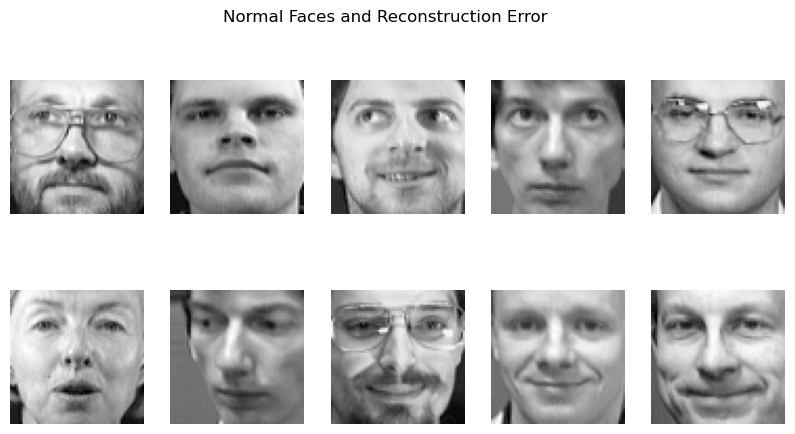

In [32]:
X_reconstructed = pca.inverse_transform(X_pca)
reconstruction_error = np.mean((X - X_reconstructed) ** 2, axis=1)

visualize_reconstruction_error(X, reconstruction_error, 'Normal Faces and Reconstruction Error')


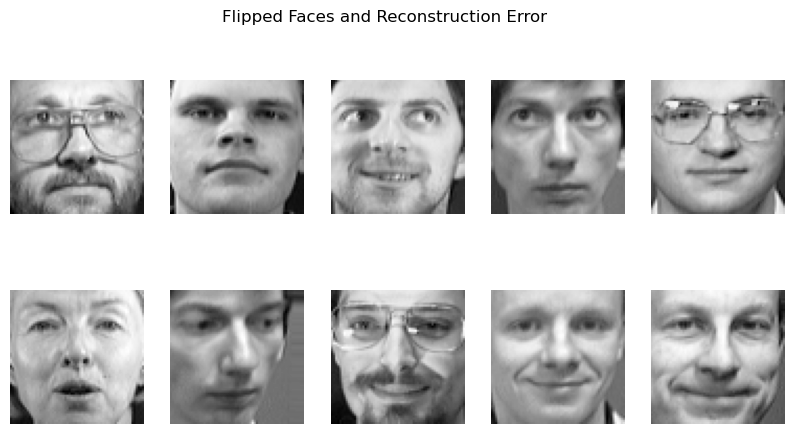

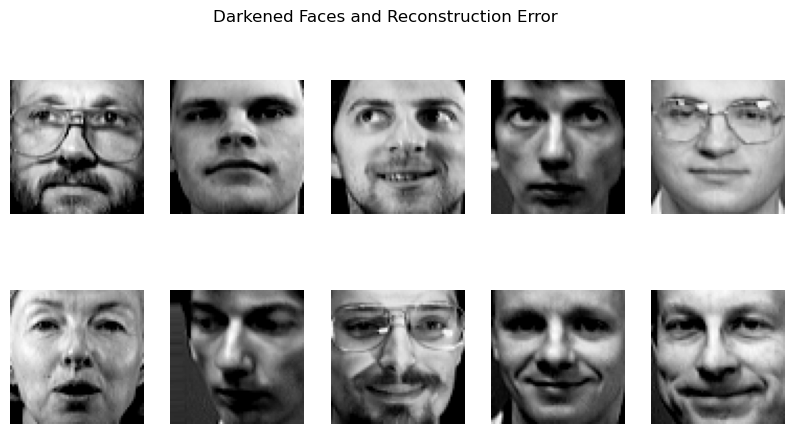

In [33]:

X_flipped = np.array([np.flip(img.reshape(64, 64), axis=1).flatten() for img in X])
X_darkened = np.array([np.clip(img - 0.3, 0, 1) for img in X])

X_flipped_pca = pca.transform(X_flipped)
X_flipped_reconstructed = pca.inverse_transform(X_flipped_pca)
X_darkened_pca = pca.transform(X_darkened)
X_darkened_reconstructed = pca.inverse_transform(X_darkened_pca)

reconstruction_error_flipped = np.mean((X_flipped - X_flipped_reconstructed) ** 2, axis=1)
reconstruction_error_darkened = np.mean((X_darkened - X_darkened_reconstructed) ** 2, axis=1)

visualize_reconstruction_error(X_flipped, reconstruction_error_flipped, 'Flipped Faces and Reconstruction Error')
visualize_reconstruction_error(X_darkened, reconstruction_error_darkened, 'Darkened Faces and Reconstruction Error')


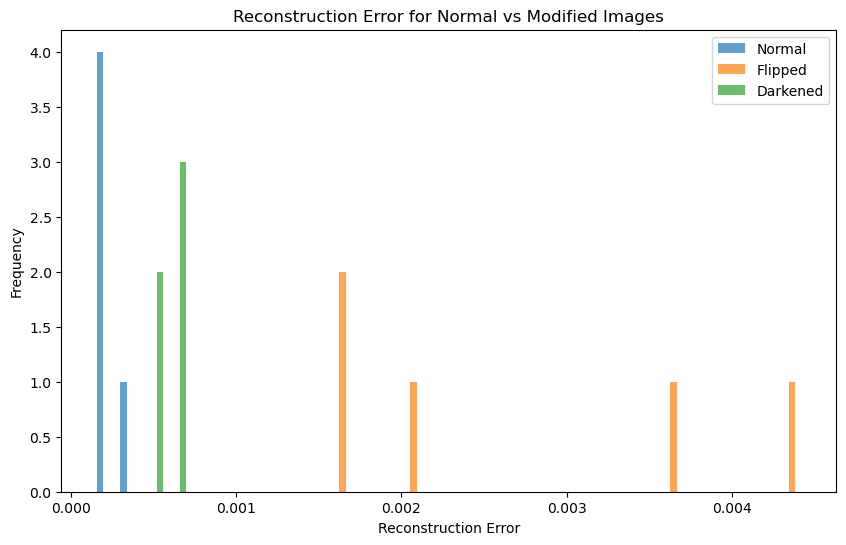

In [34]:
plt.figure(figsize=(10, 6))
plt.hist([reconstruction_error[:5], reconstruction_error_flipped[:5], reconstruction_error_darkened[:5]],
         bins=30, label=['Normal', 'Flipped', 'Darkened'], alpha=0.7)
plt.legend()
plt.title('Reconstruction Error for Normal vs Modified Images')
plt.xlabel('Reconstruction Error')
plt.ylabel('Frequency')
plt.show()